In [1]:
#Import packages
#Base packages
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf

#Figure setting
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"]=300
plt.rcParams['figure.figsize']=[8,6]

# #Remove warnings
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

#scGAE modules
from scgae import SCGAE
from preprocessing import *
from utils import *
from losses import *
from clustering import *

In [2]:
#from spektral.layers import Gra

In [4]:
#Load data
count = np.array(pd.read_csv("demo_data/demo_data_norm.csv", index_col=0, sep="\t"))
idents = np.array(pd.read_csv("demo_data/idents.csv", index_col=0, sep="\t")).reshape(-1,)

(2, 0)

In [5]:
#Build model
adj, adj_n = get_adj(count)
model = SCGAE(count, adj=adj, adj_n=adj_n)

#Pre-training
model.pre_train(epochs = 120)

ValueError: Found array with 0 feature(s) (shape=(2, 0)) while a minimum of 1 is required.

In [5]:
get_adj

<function preprocessing.get_adj(count, k=35, pca=50, mode='connectivity')>

In [6]:
model.decoderX

<AxesSubplot:>

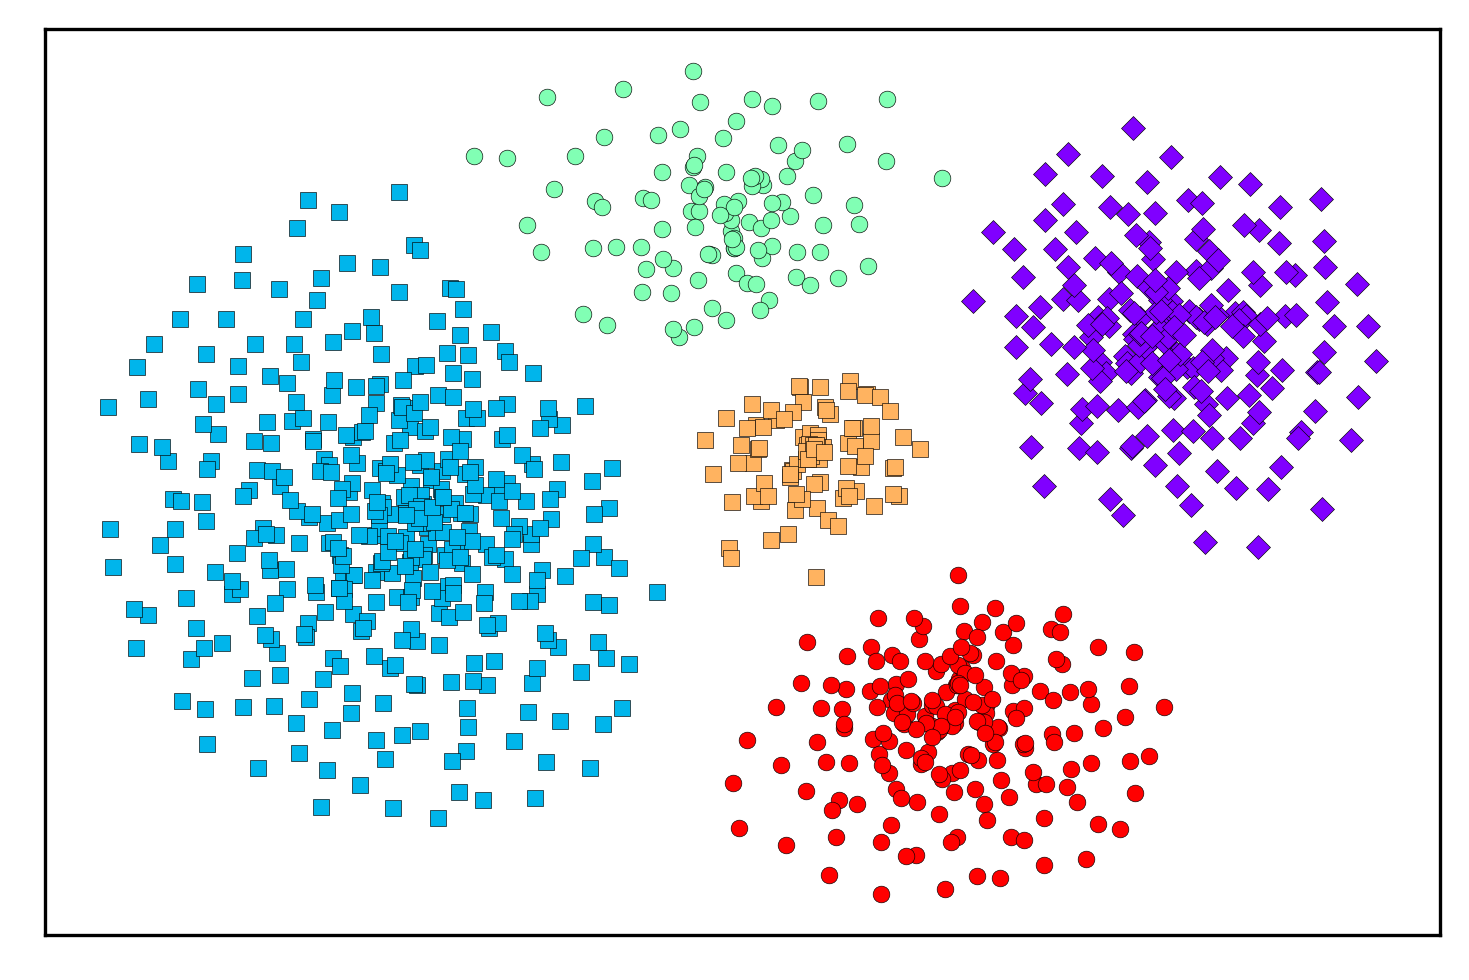

In [7]:
count2 = dotsne(count, dim=2)


<AxesSubplot:>

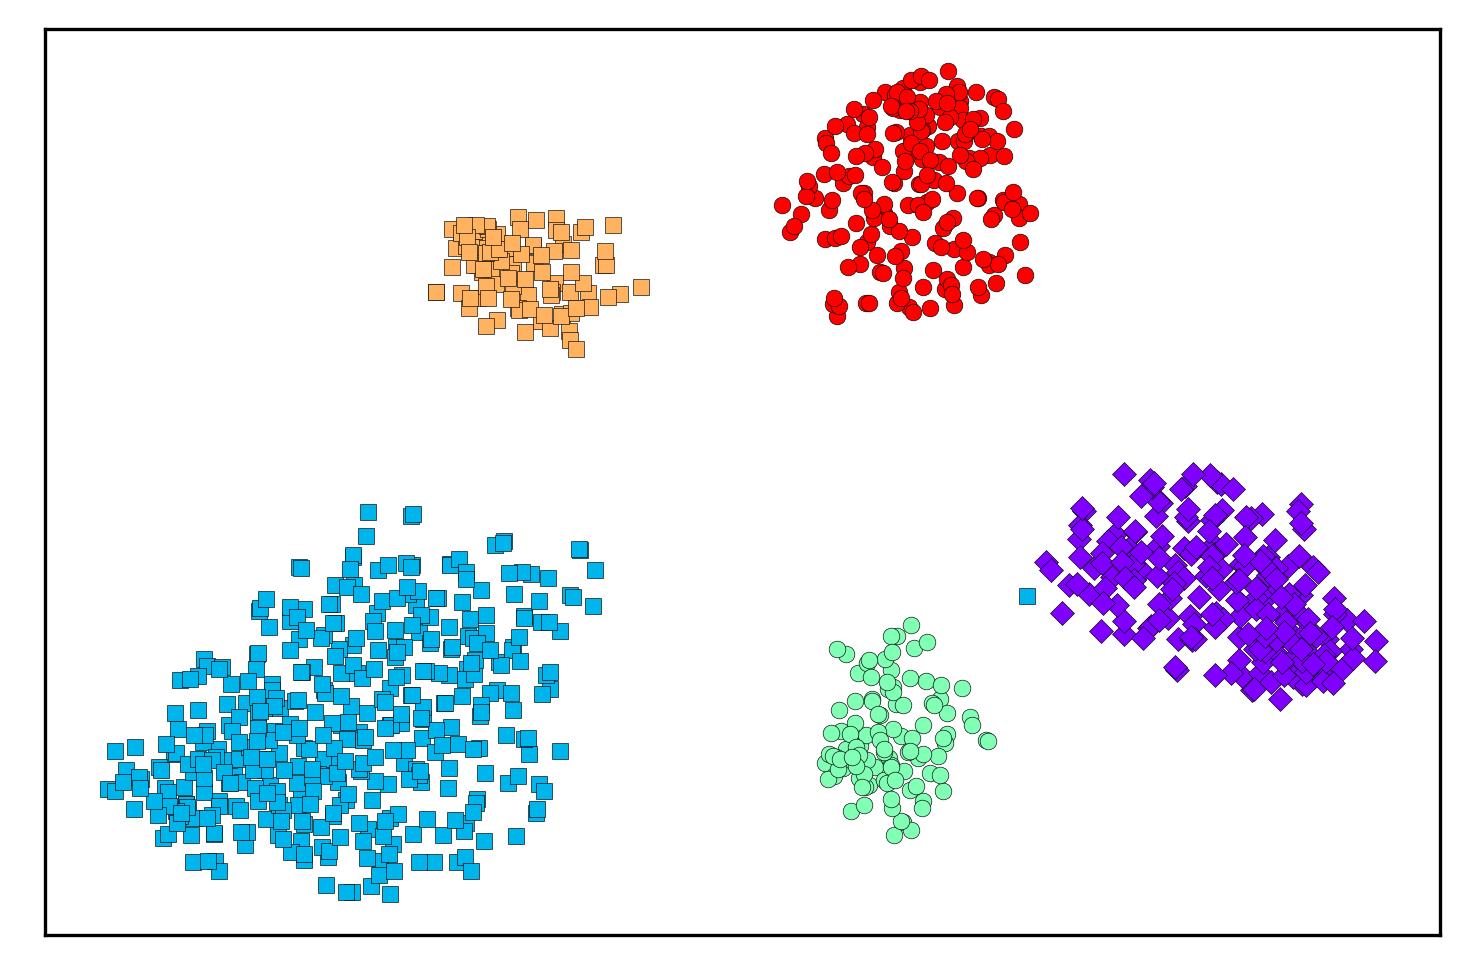

In [8]:
#Genertate latent embedding and visualization
Y = model.embedding(count, adj_n)
Y2 = dotsne(Y)
myscatter(Y2, idents)

In [9]:
Y

array([[-5.13288   ,  8.224973  ,  5.72384   , ...,  1.2649037 ,
         4.9412074 , -1.3512245 ],
       [-9.166663  , -1.2349008 ,  2.6792593 , ...,  2.5581112 ,
         8.591062  , -0.52593946],
       [-2.7217982 ,  2.71167   ,  4.9741287 , ...,  5.488058  ,
         6.054239  , -2.3764355 ],
       ...,
       [-5.6653547 , 11.368278  ,  8.740587  , ...,  4.919882  ,
         6.494693  , -0.96409565],
       [-3.1505375 ,  4.882834  ,  4.238544  , ...,  4.5642757 ,
         7.929816  , -2.6028056 ],
       [-4.375361  ,  7.768086  ,  5.236982  , ..., -0.5834472 ,
         3.7930527 ,  1.2341006 ]], dtype=float32)

In [10]:
#For data with cluster structure, do the following steps for clustering-training
#Initialize cluster centers by Louvain clustering
from clustering import louvain
cl_model = louvain(level=0.5)
cl_model.update(Y, adj_mat=adj)
labels = cl_model.labels
centers = computeCentroids(Y, labels)

In [11]:
#Initialize cluster centers by Spectral clustering with known number of clusters
#n_clusters = 5
#from sklearn.cluster import SpectralClustering
#labels = SpectralClustering(n_clusters=n_clusters,affinity="precomputed", assign_labels="discretize",random_state=0).fit_predict(adj)
#centers = computeCentroids(Y, labels)

In [12]:
#Clustering training
model.alt_train(epochs=40,centers=centers)

Epoch 0  X_rec_loss:  0.4125164  A_rec_loss:  0.035  cluster_loss:  0.15340692
Epoch 8  X_rec_loss:  0.41484094  A_rec_loss:  0.035  cluster_loss:  0.19782004
Epoch 16  X_rec_loss:  0.4184306  A_rec_loss:  0.035  cluster_loss:  0.20868927
Epoch 24  X_rec_loss:  0.4244074  A_rec_loss:  0.035  cluster_loss:  0.20109674
Epoch 32  X_rec_loss:  0.43246266  A_rec_loss:  0.035  cluster_loss:  0.18741132


<AxesSubplot:>

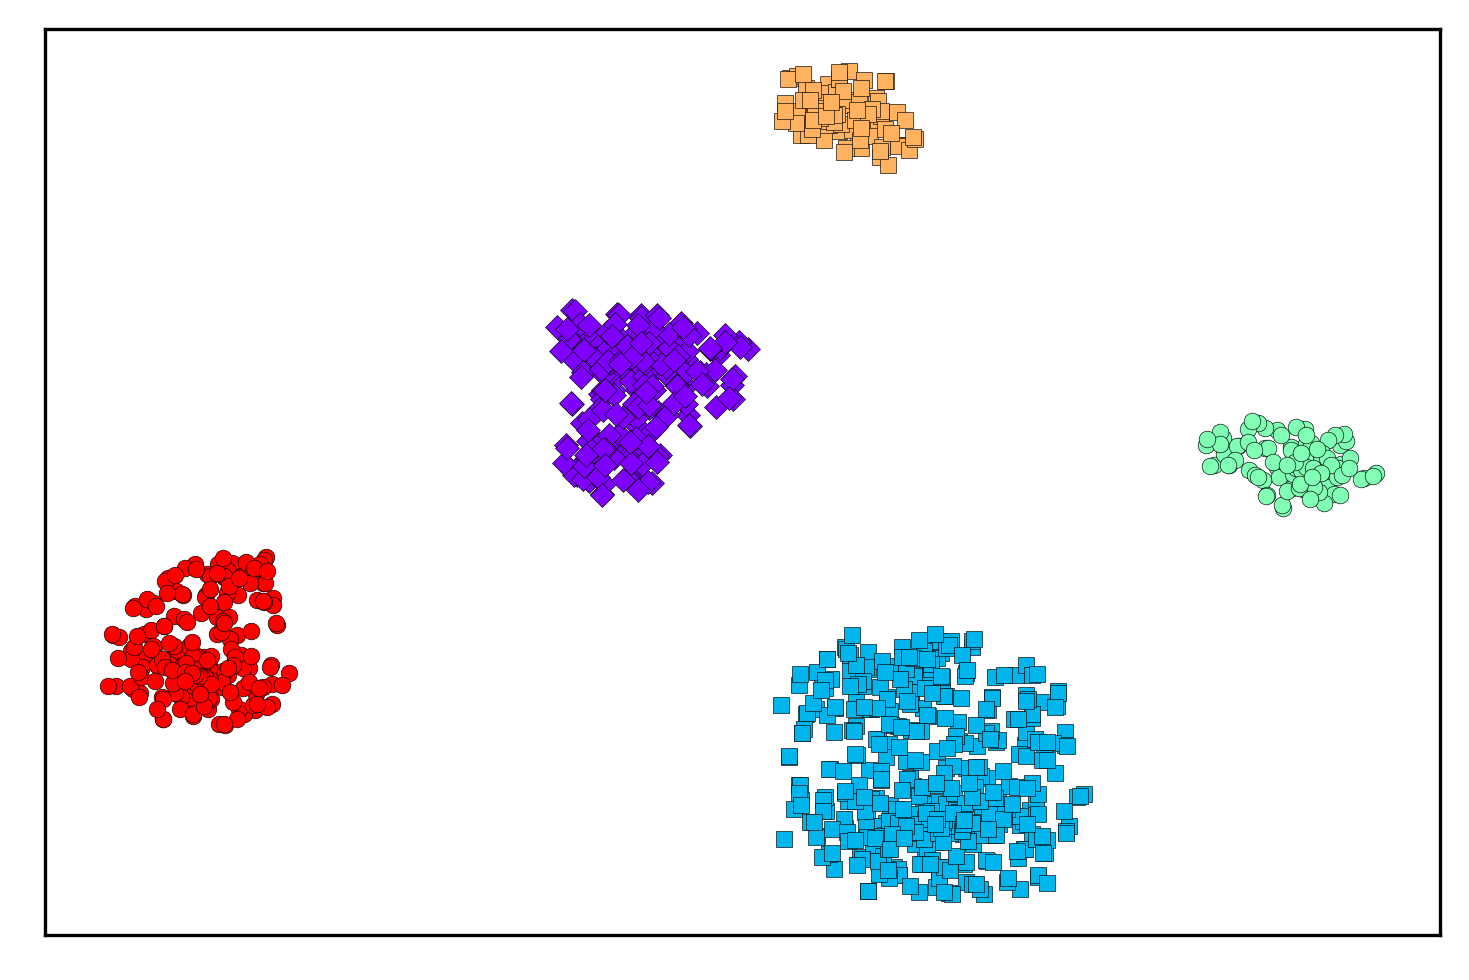

In [13]:
#Genertate latent embedding and visualization after clustering-training
Ynew = model.embedding(count, adj_n)
Y2new = dotsne(Ynew, dim=2)
myscatter(Y2new, idents)

In [14]:
Y

array([[-5.13288   ,  8.224973  ,  5.72384   , ...,  1.2649037 ,
         4.9412074 , -1.3512245 ],
       [-9.166663  , -1.2349008 ,  2.6792593 , ...,  2.5581112 ,
         8.591062  , -0.52593946],
       [-2.7217982 ,  2.71167   ,  4.9741287 , ...,  5.488058  ,
         6.054239  , -2.3764355 ],
       ...,
       [-5.6653547 , 11.368278  ,  8.740587  , ...,  4.919882  ,
         6.494693  , -0.96409565],
       [-3.1505375 ,  4.882834  ,  4.238544  , ...,  4.5642757 ,
         7.929816  , -2.6028056 ],
       [-4.375361  ,  7.768086  ,  5.236982  , ..., -0.5834472 ,
         3.7930527 ,  1.2341006 ]], dtype=float32)

In [15]:
Y.shape

(1000, 10)

In [16]:
count

array([[-0.55998117, -0.30210789,  2.04062799, ..., -0.18602283,
        -0.75873013, -0.13273877],
       [-0.57017108,  0.05991362, -0.20005945, ..., -0.19272832,
         0.87835165, -0.69064506],
       [-0.56150518,  0.74656107, -0.19424657, ..., -0.18700822,
        -0.23755016, -0.32981104],
       ...,
       [-0.54959161, -0.19603132, -0.18655873, ...,  1.25334549,
        -0.55790029,  0.92120823],
       [-0.55394092, -0.45318601, -0.18932599, ..., -0.18217537,
        -0.45653339, -0.67415986],
       [-0.5707123 ,  0.9639953 , -0.2004289 , ..., -0.1930924 ,
        -0.1784362 , -0.6911956 ]])

In [17]:
count.shape

(1000, 1943)